In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("FullData.csv")
df.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


In [3]:
del (df['National_Position'],df['National_Kit'],df['Club_Kit'],df['Club_Joining'],df['Contract_Expiry'])
df.head()

,Name,Nationality,Club,Club_Position,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,Real Madrid,LW,94,185 cm,80 kg,Right,02/05/1985,32,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,FC Barcelona,RW,93,170 cm,72 kg,Left,06/24/1987,29,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,FC Barcelona,LW,92,174 cm,68 kg,Right,02/05/1992,25,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,FC Barcelona,ST,92,182 cm,85 kg,Right,01/24/1987,30,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,FC Bayern,GK,92,193 cm,92 kg,Right,03/27/1986,31,...,16,14,11,47,11,91,89,95,90,89


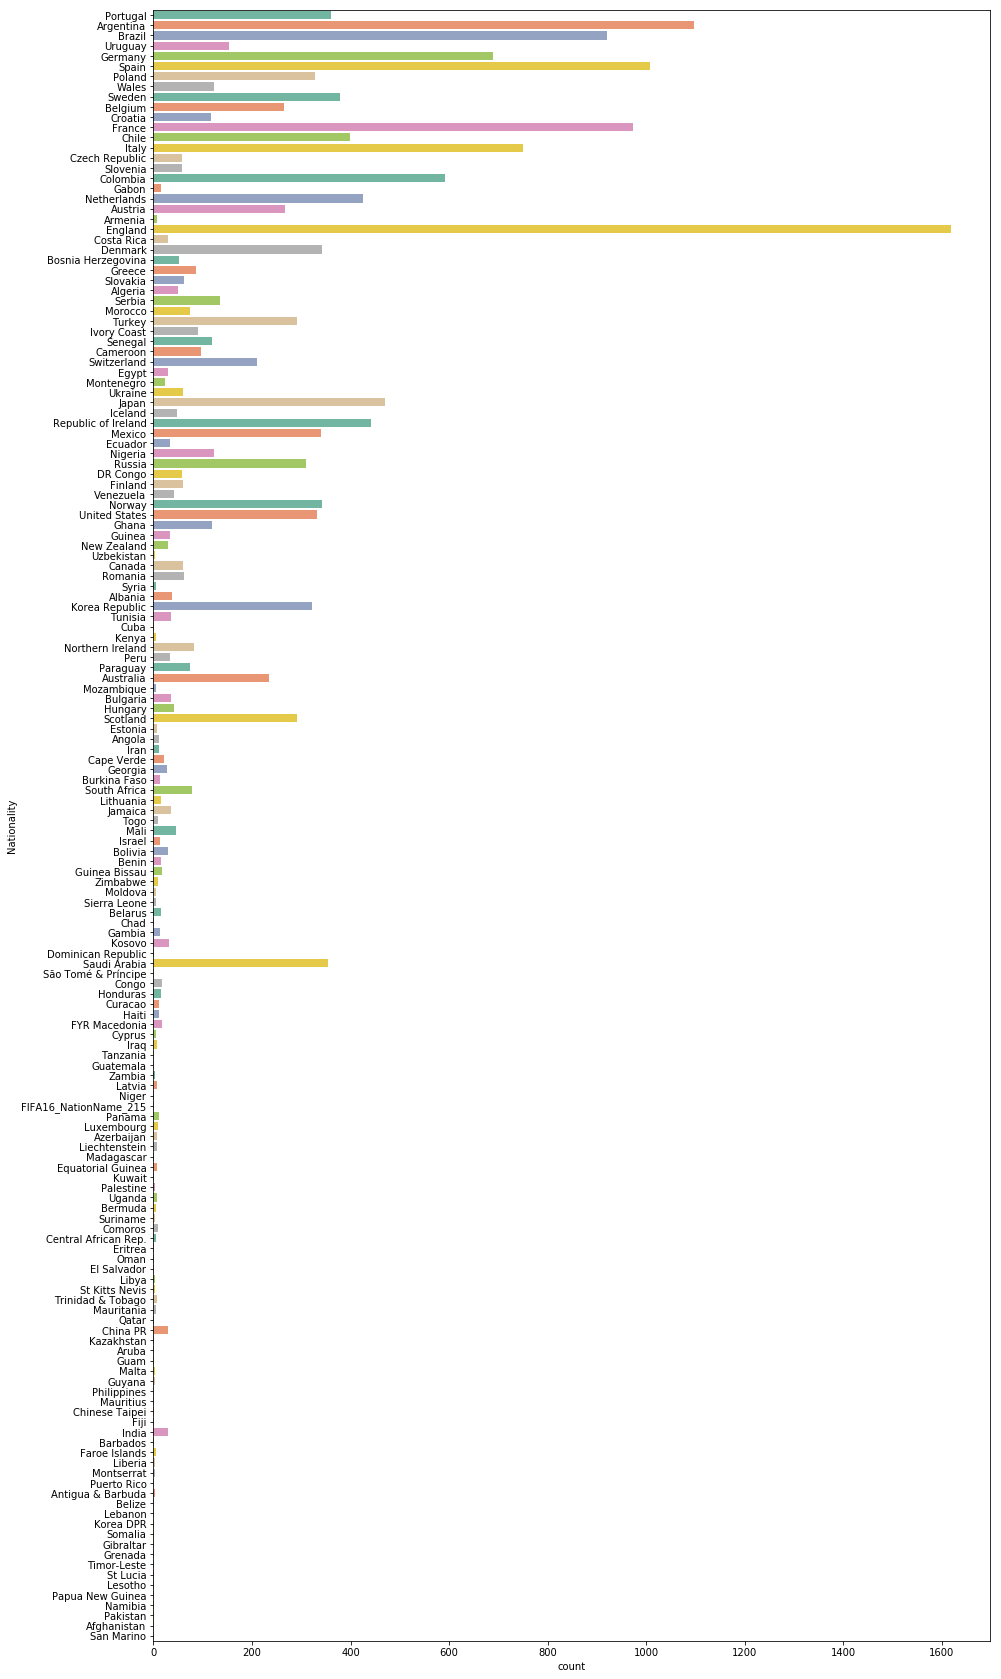

In [4]:
plt.figure(figsize=(15,30))
sns.countplot( y = df.Nationality , palette = "Set2")#shows the plot of (no. of players) for different Countries.

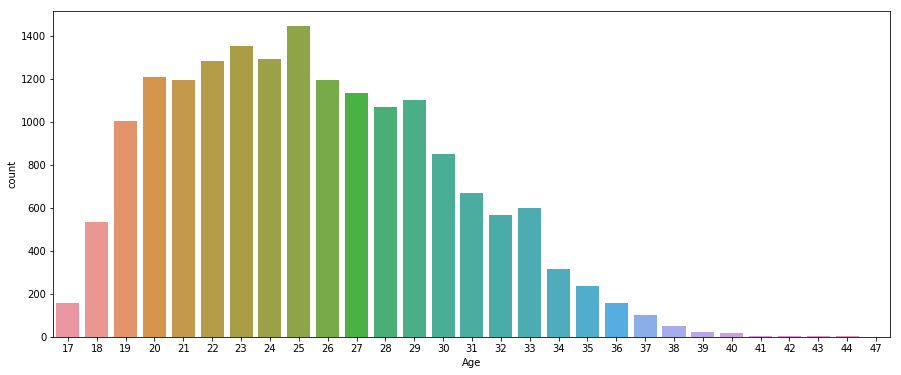

In [5]:
plt.figure(figsize=(15,6))
sns.countplot(x='Age',data=df)#shows the plot of players age

# For Best Goal-Keeper


In [6]:
a=1
b=2
c=3
d=4
df['gk_based_shotkeep']=(c*df.Reactions + b*df.Composure + c*df.Speed + b*df.Strength + c*df.Jumping + d*df.GK_Positioning 
                         + d*df.GK_Diving + d*df.GK_Reflexes + d*df.GK_Handling)/(2*b+3*c+4*d)
df['gk_based_sweep']=(b*df.Reactions + b*df.Composure + b*df.Speed + a*df.Short_Pass + a*df.Long_Pass + b*df.Jumping 
                      + c*df.Vision + c*df.GK_Positioning + c*df.GK_Diving + d*df.GK_Reflexes + b*df.GK_Handling 
                      + d*df.GK_Kicking)/(2*a+5*b+3*c+2*d)


Text(0, 0.5, 'Score based on Stopping Shot')

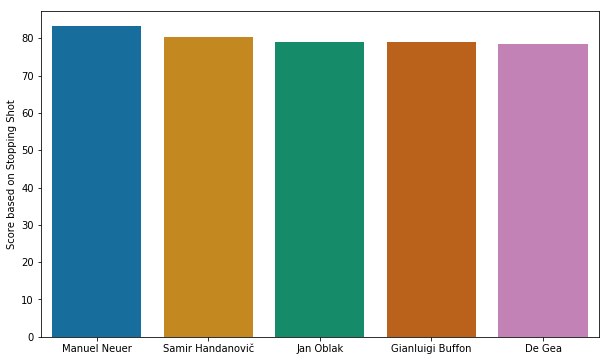

In [7]:
plt.figure(figsize=(10,6))
sd=df.sort_values('gk_based_shotkeep',ascending=False)[:5]
x1=np.array(list(sd['Name']))
y1=np.array(list(sd['gk_based_shotkeep']))
sns.barplot(x1,y1,palette="colorblind")
plt.ylabel("Score based on Stopping Shot")

In [8]:
#On the Basis of (Stopping Shot) Goalkeeper's position can be placed by (MANUEL NEUER)

Text(0, 0.5, 'Score based on good Sweeper')

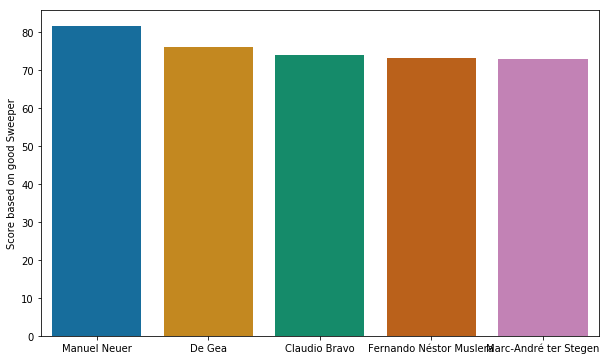

In [9]:
plt.figure(figsize=(10,6))
sd=df.sort_values('gk_based_sweep',ascending=False)[:5]
x1=np.array(list(sd['Name']))
y1=np.array(list(sd['gk_based_sweep']))
sns.barplot(x1,y1,palette="colorblind")
plt.ylabel("Score based on good Sweeper")

# Here both the possibility shows same result , Hence

# (MANUEL NEUER=Goal-Keeper)

In [10]:
# Now for the (DEFENDERS) 

# Now to find the DEFENDERS

In [11]:
df['centre_back_def']=(d*df.Sliding_Tackle + d*df.Standing_Tackle + c*df.Speed + b*df.Long_Pass + c*df.Short_Pass + 
                       b*df.Vision + b*df.Stamina + d*df.Interceptions + d*df.Marking + b*df.Ball_Control 
                       + c*df.Reactions + a*df.Crossing)/(a+5*b+3*c+4*d)
df['wing_back_def']=(d*df.Sliding_Tackle + d*df.Standing_Tackle + b*df.Speed + c*df.Long_Pass + c*df.Short_Pass + b*df.Vision 
                      + b*df.Stamina + d*df.Interceptions + d*df.Marking + c*df.Ball_Control + b*df.Reactions + b*df.Curve 
                     + c*df.Acceleration + c*df.Crossing + c*df.Strength)/(5*b+6*c+4*d)

Text(0, 0.5, 'Score of Left Centre Defender')

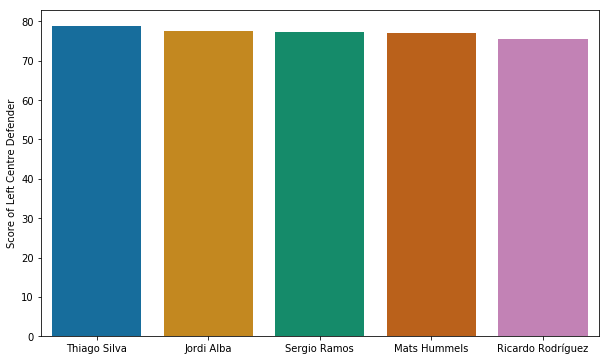

In [12]:
# For (Left Centre Back Defender)

plt.figure(figsize=(10,6))
sd=df[(df['Club_Position']=='LCB')]
sd=sd.sort_values('centre_back_def',ascending=False)[:5]
x2=np.array(list(sd['Name']))
y2=np.array(list(sd['centre_back_def']))
sns.barplot(x2,y2,palette="colorblind")
plt.ylabel("Score of Left Centre Defender")

# (Left Centre Defender = THIAGO SILVA)

Text(0, 0.5, 'Score of Right Centre Defender')

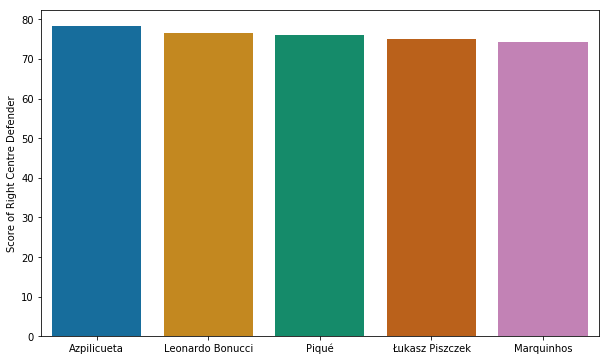

In [13]:
# For the Right Centre Defender

plt.figure(figsize=(10,6))
sd=df[(df['Club_Position']=='RCB')]
sd=sd.sort_values('centre_back_def',ascending=False)[:5]
x3=np.array(list(sd['Name']))
y3=np.array(list(sd['centre_back_def']))
sns.barplot(x3,y3,palette="colorblind")
plt.ylabel("Score of Right Centre Defender")


# (Right Centre Defender = AZPILICUETA)

Text(0, 0.5, 'Score of Left Wing Defender')

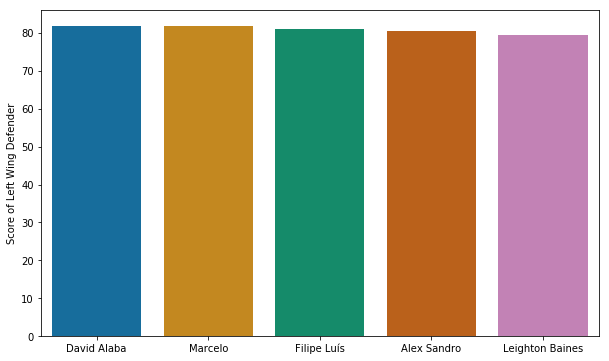

In [14]:
# For Left Wing Defender

plt.figure(figsize=(10,6))
sd=df[(df['Club_Position']=='LWB')| (df['Club_Position']=='LB')]
sd=sd.sort_values('wing_back_def',ascending=False)[:5]
x4=np.array(list(sd['Name']))
y4=np.array(list(sd['wing_back_def']))
sns.barplot(x4,y4,palette="colorblind")
plt.ylabel("Score of Left Wing Defender")

# (Left Wing Defender = DAVID ALABA)

Text(0, 0.5, 'Score of Right Wing Defender')

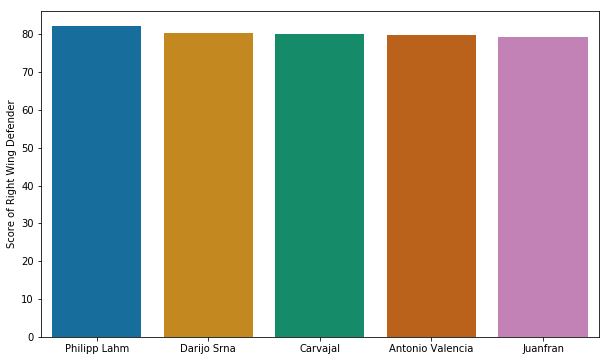

In [15]:
# For Right Wing Defender

plt.figure(figsize=(10,6))
sd=df[(df['Club_Position']=='RWB')|(df['Club_Position']=='RB')]
sd=sd.sort_values('wing_back_def',ascending=False)[:5]
x5=np.array(list(sd['Name']))
y5=np.array(list(sd['wing_back_def']))
sns.barplot(x5,y5,palette="colorblind")
plt.ylabel("Score of Right Wing Defender")

# (Right Wing Defender = PHILIPP LAHM)

In [16]:
# For MIDFIELDERS

# To Find MID-FIELDERS

In [17]:
df['cm_cam']=( d*df.Ball_Control + d*df.Dribbling + b*df.Marking + c*df.Reactions + d*df.Vision + d*df.Attacking_Position 
              + c*df.Crossing + c*df.Short_Pass + b*df.Long_Pass + b*df.Curve + c*df.Long_Shots + b*df.Freekick_Accuracy
             + d*df.Speed + d*df.Acceleration + b*df.Stamina + c*df.Shot_Power + c*df.Skill_Moves)/(5*b+6*c+5*d)


df['lm_lam']=(c*df.Ball_Control + c*df.Dribbling + b*df.Marking + c*df.Reactions + b*df.Vision + c*df.Attacking_Position 
              + d*df.Crossing + d*df.Short_Pass + d*df.Long_Pass + c*df.Curve + c*df.Long_Shots + c*df.Freekick_Accuracy
             + d*df.Speed + c*df.Acceleration + b*df.Stamina + c*df.Shot_Power + b*df.Skill_Moves)/(4*b+9*c+4*d)


df['rm_ram']=(c*df.Ball_Control + c*df.Dribbling + b*df.Marking + c*df.Reactions + b*df.Vision + c*df.Attacking_Position 
              + d*df.Crossing + d*df.Short_Pass + d*df.Long_Pass + c*df.Curve + c*df.Long_Shots + c*df.Freekick_Accuracy
             + d*df.Speed + c*df.Acceleration + b*df.Stamina + c*df.Shot_Power + b*df.Skill_Moves)/(4*b+9*c+4*d)

df['cm_cdm']=(b*df.Ball_Control + b*df.Dribbling + d*df.Marking + d*df.Reactions + d*df.Vision + b*df.Attacking_Position 
              + b*df.Crossing + c*df.Short_Pass + c*df.Long_Pass + c*df.Curve + b*df.Long_Shots + b*df.Freekick_Accuracy
             + c*df.Speed + c*df.Acceleration + c*df.Stamina + d*df.Interceptions )/(6*b+6*c+4*d)


Text(0, 0.5, 'Score of Centre Attacking MidFielder')

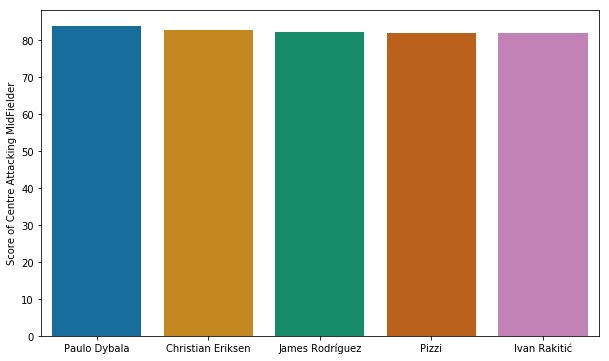

In [18]:
# For Centre Attacking MidFielder

plt.figure(figsize=(10,6))
sd=df[(df['Club_Position']=='CM')|(df['Club_Position']=='CAM')]
sd=sd.sort_values('cm_cam',ascending=False)[:5]
x6=np.array(list(sd['Name']))
y6=np.array(list(sd['cm_cam']))
sns.barplot(x6,y6,palette="colorblind")
plt.ylabel("Score of Centre Attacking MidFielder")

# (Centre Attacking MidFielder = PAULO DYBALA)

Text(0, 0.5, 'Score of Centre Defending MidFielder')

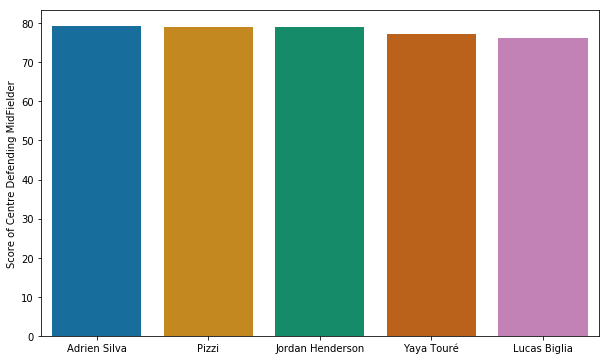

In [19]:
# For Center Defending MidFielder


plt.figure(figsize=(10,6))
sd=df[(df['Club_Position']=='CM')|(df['Club_Position']=='CDM')]
sd=sd.sort_values('cm_cdm',ascending=False)[:5]
x7=np.array(list(sd['Name']))
y7=np.array(list(sd['cm_cdm']))
sns.barplot(x7,y7,palette="colorblind")
plt.ylabel("Score of Centre Defending MidFielder")

# (Centre Defending MidFielder = ADRIEN SILVA)

Text(0, 0.5, 'Score of Left Attacking MidFielder')

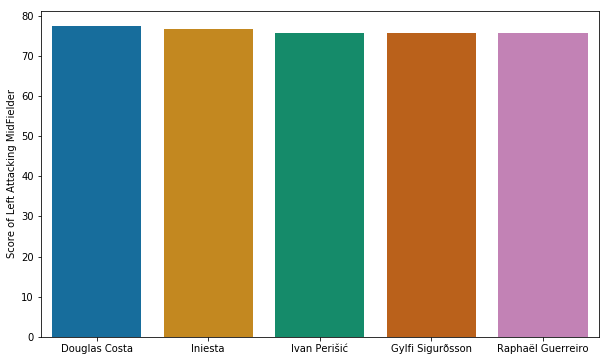

In [20]:
# For Left Attacking MidFielder


plt.figure(figsize=(10,6))
sd=df[(df['Club_Position']=='LM')|(df['Club_Position']=='LAM')]
sd=sd.sort_values('lm_lam',ascending=False)[:5]
x8=np.array(list(sd['Name']))
y8=np.array(list(sd['lm_lam']))
sns.barplot(x8,y8,palette="colorblind")
plt.ylabel("Score of Left Attacking MidFielder")

# (Left Attacking MidFielder = DOUGLAS COSTA)

Text(0, 0.5, 'Score of Right Attacking MidFielder')

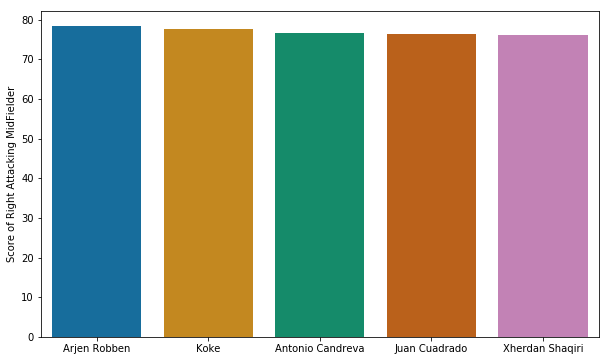

In [21]:
# For Right Attacking MidFielder

plt.figure(figsize=(10,6))
sd=df[(df['Club_Position']=='RM')|(df['Club_Position']=='RAM')]
sd=sd.sort_values('rm_ram',ascending=False)[:5]
x9=np.array(list(sd['Name']))
y9=np.array(list(sd['rm_ram']))
sns.barplot(x9,y9,palette="colorblind")
plt.ylabel("Score of Right Attacking MidFielder")

# (Right Attacking MidFielder = ARJEN ROBBEN)

In [22]:
# For Forwards

# For the FORWARDS

In [23]:
df['left_wing']=(d*df.Ball_Control + c*df.Dribbling + c*df.Speed + c*df.Acceleration + b*df.Vision + c*df.Crossing 
                 + c*df.Short_Pass + c*df.Long_Pass + c*df.Curve + d*df.Long_Shots + b*df.Aggression + b*df.Agility 
                 + d*df.Freekick_Accuracy + d*df.Finishing + c*df.Penalties + d*df.Volleys + d*df.Shot_Power)/(3*b+8*c+6*d)

df['right_wing']=(d*df.Ball_Control + d*df.Dribbling + d*df.Speed + d*df.Acceleration + c*df.Vision + c*df.Crossing 
                 + c*df.Short_Pass + c*df.Long_Pass + b*df.Curve + c*df.Long_Shots + b*df.Aggression + b*df.Agility 
                 + c*df.Freekick_Accuracy + d*df.Finishing + c*df.Penalties + b*df.Volleys + d*df.Attacking_Position)/(4*b+7*c+6*d)

Text(0, 0.5, 'Score of Left Wing Forward')

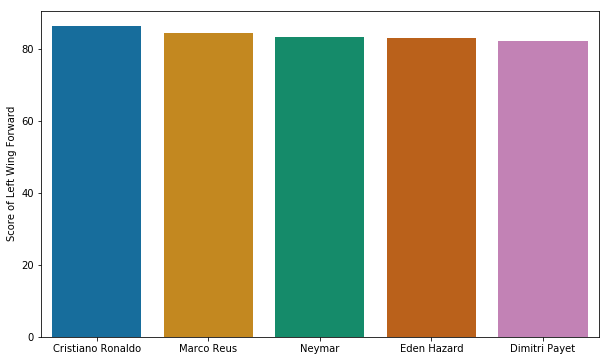

In [24]:
# For Left Wing Forward

plt.figure(figsize=(10,6))
sd=df[(df['Club_Position']=='LW')]
sd=sd.sort_values('left_wing',ascending=False)[:5]
x10=np.array(list(sd['Name']))
y10=np.array(list(sd['left_wing']))
sns.barplot(x10,y10,palette="colorblind")
plt.ylabel("Score of Left Wing Forward")

# (Left Wing Forward = CRISTIANO RONALDO)

Text(0, 0.5, 'Score of Right Wing Forward')

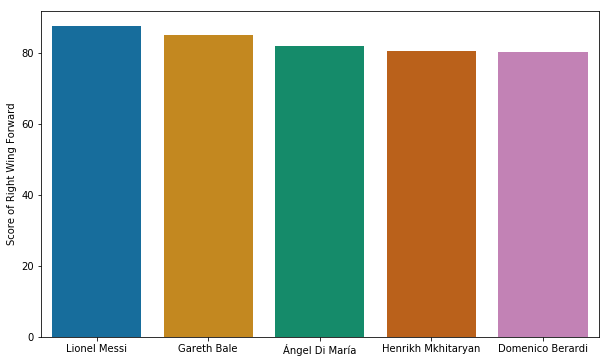

In [25]:
# For Right Wing Forward

plt.figure(figsize=(10,6))
sd=df[(df['Club_Position']=='RW')]
sd=sd.sort_values('right_wing',ascending=False)[:5]
x11=np.array(list(sd['Name']))
y11=np.array(list(sd['right_wing']))
sns.barplot(x11,y11,palette="colorblind")
plt.ylabel("Score of Right Wing Forward")

# (Right Wing Forward = LIONEL MESSI)

In [26]:
# Here we formed a Team of the best 11 for the Formation 4-4-2
# GOALKEEPER:- Manuel Neuer(GK)
# 4-DEFENDERS :- Philipp Lahm(RB/RWB) , David Alaba(LB/LWB) , Cesar Azpilicueta(RCB) , Thiago Silva(LCB)
# 4-MID-FIELDERS :- Arjen Robben(RM/RAM) , Douglas Costa(LM/LAM) , Adrien Silva(CM/CDM) , Paulo Dybala(CM/CAM)
# 2-FORWARDS :- Cristiano Ronaldo(LW) , Lionel Messi(RW)